# 1.  Завдання щодо генерації текстів або машинного перекладу (на вибір) на базі рекурентних мереж або трансформерів (на вибір). 
Вирішіть завдання щодо генерації текстів або машинного перекладу. Особливо вітаються україномовні моделі.  

### Генерація тексту на базі рекурентних мереж

In [4]:
import numpy
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint

In [5]:
# load ascii text and covert to lowercase
filename = "Franko_Ivan-Franko-pro-Grigoriya-Skovorodu-.382401.txt"
raw_text = open(filename,encoding="utf8").read()
raw_text = raw_text.lower()[:10000]

In [7]:
raw_text[:200]

'\ufeff   \n   \n  іван франко о григории сковороде\n   \n   сочинения григория саввича сковороды,\n   собранные и редактированные проф. д. и. багалеем. юбилейное издание (1794—1894 год), с портретом его, видом '

In [8]:
# create mapping of unique chars to integers
chars = sorted(list(set(raw_text)))
char_to_int = dict((c, i) for i, c in enumerate(chars))

n_chars = len(raw_text)
n_vocab = len(chars)
print ("Total Characters: ", n_chars, "\nTotal Vocab: ", n_vocab)

Total Characters:  10000 
Total Vocab:  64


In [18]:
# prepare the dataset of input to output pairs encoded as integers
seq_length = 64
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
	seq_in = raw_text[i:i + seq_length]
	seq_out = raw_text[i + seq_length]
	dataX.append([char_to_int[char] for char in seq_in])
	dataY.append(char_to_int[seq_out])
n_patterns = len(dataX)
print ("Total Patterns: ", n_patterns)

Total Patterns:  9936


In [19]:
# reshape X to be [samples, time steps, features]
X = numpy.reshape(dataX, (n_patterns, seq_length, 1))
# normalize
X = X / float(n_vocab)
# one hot encode the output variable
y = tf.keras.utils.to_categorical(dataY)

In [25]:
# define the LSTM model
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [26]:
model.fit(X, y, epochs=100, batch_size=64)

Epoch 1/100
156/156 [==============================] - 11s 65ms/step - loss: 3.3708
Epoch 2/100
156/156 [==============================] - 10s 65ms/step - loss: 3.3017
Epoch 3/100
156/156 [==============================] - 11s 71ms/step - loss: 3.2956
Epoch 4/100
156/156 [==============================] - 11s 70ms/step - loss: 3.2877
Epoch 5/100
156/156 [==============================] - 11s 71ms/step - loss: 3.2853
Epoch 6/100
156/156 [==============================] - 11s 69ms/step - loss: 3.2781
Epoch 7/100
156/156 [==============================] - 11s 71ms/step - loss: 3.2649
Epoch 8/100
156/156 [==============================] - 11s 70ms/step - loss: 3.2406
Epoch 9/100
156/156 [==============================] - 11s 71ms/step - loss: 3.2087
Epoch 10/100
156/156 [==============================] - 11s 70ms/step - loss: 3.1730
Epoch 11/100
156/156 [==============================] - 11s 70ms/step - loss: 3.1500
Epoch 12/100
156/156 [==============================] - 11s 71ms/step - lo

In [30]:
import sys

int_to_char = dict((i, c) for i, c in enumerate(chars))

# pick a random seed
start = numpy.random.randint(0, len(dataX)-1)
pattern = dataX[start]
print ("Seed:")
print ("\"", ''.join([int_to_char[value] for value in pattern]), "\"")
# generate characters
print("\nGerenated text: ")
for i in range(300):
	x = numpy.reshape(pattern, (1, len(pattern), 1))
	x = x / float(n_vocab)
	prediction = model.predict(x, verbose=0)
	index = numpy.argmax(prediction)
	result = int_to_char[index]
	seq_in = [int_to_char[value] for value in pattern]
	sys.stdout.write(result)
	pattern.append(index)
	pattern = pattern[1:len(pattern)]
print ("\nDone.")

Seed:
" о, що не без підстави звісна вчена пані єфименкова* порівняла ск "

Gerenated text: 
овороду зі стародавніми вчителями української суспільності.    отеє були важніші події в житті сковороди. коли додати до того ще його замилування до музики, до співу і віршування, то зрозуміємі, що не без підстави звісна вчена пані єфименкова* порівняла сковороду зі стародавніми вчителями українсько
Done.


In [59]:
#Вчити мабуть треба довше або нейросітку трошки більшу, але я справді замучився чекати, вибачте(

# 2. Проведіть експерименти з моделями бібліотеки HF Transformers (https://huggingface.co/) за допомогою (наприклад) Pipeline модуля

In [27]:
from transformers import pipeline

pipe = pipeline("token-classification", model="ukr-models/uk-ner")

pipe("Могила Тараса Шевченка — місце поховання видатного українського поета Тараса Шевченка в місті Канів (Черкаська область) на Чернечій горі, над яким із 1939 року височіє бронзовий пам'ятник роботи скульптора Матвія Манізера.")

config.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/457 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/854k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.37M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/238 [00:00<?, ?B/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


[{'entity': 'B-PER',
  'score': 0.9621774,
  'index': 3,
  'word': '▁Тарас',
  'start': 6,
  'end': 12},
 {'entity': 'B-PER',
  'score': 0.95024174,
  'index': 4,
  'word': 'а',
  'start': 12,
  'end': 13},
 {'entity': 'I-PER',
  'score': 0.8984028,
  'index': 5,
  'word': '▁Шевченка',
  'start': 13,
  'end': 22},
 {'entity': 'B-PER',
  'score': 0.9997545,
  'index': 16,
  'word': '▁Тарас',
  'start': 69,
  'end': 75},
 {'entity': 'B-PER',
  'score': 0.9999771,
  'index': 17,
  'word': 'а',
  'start': 75,
  'end': 76},
 {'entity': 'I-PER',
  'score': 0.99953413,
  'index': 18,
  'word': '▁Шевченка',
  'start': 76,
  'end': 85},
 {'entity': 'B-LOC',
  'score': 0.9999757,
  'index': 21,
  'word': '▁Кан',
  'start': 93,
  'end': 97},
 {'entity': 'B-LOC',
  'score': 0.99998057,
  'index': 22,
  'word': 'ів',
  'start': 97,
  'end': 99},
 {'entity': 'B-LOC',
  'score': 0.9999881,
  'index': 24,
  'word': 'Чер',
  'start': 101,
  'end': 104},
 {'entity': 'B-LOC',
  'score': 0.9999877,
  'ind

# 3. Завдання щодо генерації або стилізації зображень (на вибір)
Вирішіть завдання перенесення стилю або генерації зображень (архітектура за вашим вибором: GAN/DCGAN/VAE).

### Перенесення стилю

Following https://github.com/taavishthaman/Neural-style-transfer-with-VGG16-Keras/blob/master/vgg_16_nst.py

In [46]:
import tensorflow as tf
from PIL import Image
import numpy as np
from keras import backend
from keras.models import Model
from keras.applications.vgg16 import VGG16
from scipy.optimize import fmin_l_bfgs_b


content_path = tf.keras.utils.get_file('F_zmJJvWEAAmpte', 
                                       'https://pbs.twimg.com/media/F_zmJJvWEAAmpte?format=jpg&name=medium')
style_path = tf.keras.utils.get_file('nature_955653-13.jpg',
                                     'https://img.freepik.com/photos-premium/nature_955653-13.jpg?size=626&ext=jpg')

81840/81840 [==============================] - 0s 0us/step


In [101]:
#setting height and width of the image
height = 256
width = 256

content_image = Image.open(content_path).resize((width, height))
style_image = Image.open(style_path).resize((width, height))


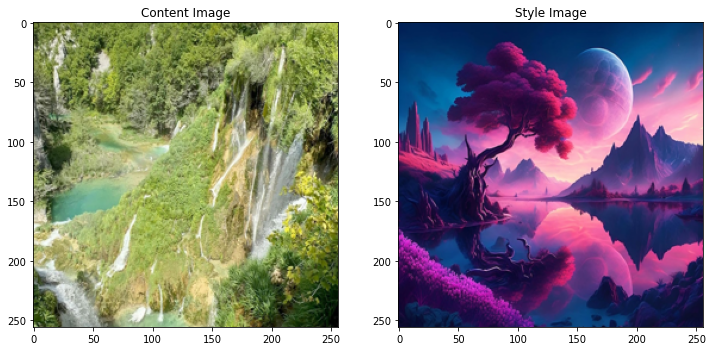

In [102]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.imshow(content_image)
plt.title('Content Image')

plt.subplot(1, 2, 2)
plt.imshow(style_image)
plt.title('Style Image')

plt.show()

In [103]:
#Convert images to 4_D array
content_array = np.asarray(content_image, dtype= 'float32')
content_array = np.expand_dims(content_array, axis=0)
print(content_array.shape)

style_array = np.asarray(style_image, dtype= 'float32')
style_array = np.expand_dims(style_array, axis=0)
print(style_array.shape)

(1, 256, 256, 3)
(1, 256, 256, 3)


In [104]:
#1) Subtract the mean RGB value from each channel in the input
#2) Flip the multidimensional array from RGB to BGR

content_array[:, :, :, 0] -= 103.939
content_array[:, :, :, 1] -= 116.779
content_array[:, :, :, 2] -= 123.68
content_array = content_array[:, :, :, ::-1]

style_array[:, :, :, 0] -= 103.939
style_array[:, :, :, 1] -= 116.779
style_array[:, :, :, 2] -= 123.68
style_array = style_array[:, :, :, ::-1]

In [105]:
#Defining variables in keras backend-->tensorflow
content_image = backend.variable(content_array)
style_image = backend.variable(style_array)
combination_image = backend.placeholder((1, height, width, 3))

#Concatenate all image data into a single tensor
input_tensor = backend.concatenate([content_image, style_image, combination_image], axis = 0)

In [106]:
#model object without the top layers/fully connected layers
model = VGG16(input_tensor=input_tensor, weights='imagenet', include_top = False)

In [107]:
layers = dict([(layer.name, layer.output) for layer in model.layers])

#Defining alpha and beta hyperparameters
content_weight = 0.025
style_weight = 5.0
total_variation_weight = 1.0

In [108]:
loss = backend.variable(0.)
#The content loss
def content_loss(content, combination):
    return backend.sum(backend.square(combination - content))

In [109]:
layer_features = layers['block2_conv2']
content_image_features = layer_features[0, :, :, :]
combination_features = layer_features[2, :, :, :]

loss = loss + content_weight * content_loss(content_image_features, combination_features)

In [110]:
#The style loss
def gram_matrix(x):
    features = backend.batch_flatten(backend.permute_dimensions(x, (2, 0, 1)))
    gram = backend.dot(features, backend.transpose(features))
    return gram

def style_loss(style, combination):
    S = gram_matrix(style)
    C = gram_matrix(combination)
    channels = 3
    size = height * width
    return backend.sum(backend.square(S - C)) / (4. * (channels ** 2) * (size ** 2))

In [111]:
#VGG16 layers used
feature_layers = ['block1_conv2', 'block2_conv2', 
                  'block3_conv3', 'block4_conv3', 
                  'block5_conv3']

for layer_name in feature_layers:
    layer_features = layers[layer_name]
    style_features = layer_features[1, : ,: ,:]
    combination_features = layer_features[2, :, :, :]
    sl = style_loss(style_features, combination_features)
    loss += (style_weight / len(feature_layers)) * sl
    
def total_variation_loss(x):
    a = backend.square(x[:, :height-1, :width-1, :] - x[:, 1:, :width-1, :])
    b = backend.square(x[:, :height-1, :width-1, :] - x[:, :height-1, 1:, :])
    return backend.sum(backend.pow(a + b, 1.25))

loss += total_variation_weight * total_variation_loss(combination_image)

tf.compat.v1.disable_eager_execution()
grads = backend.gradients(loss, combination_image)

outputs = [loss]
outputs += grads
f_outputs = backend.function([combination_image], outputs)


In [112]:
def eval_loss_and_grads(x):
    x = x.reshape((1, height, width, 3))
    outs = f_outputs([x])
    loss_value = outs[0]
    grad_values = outs[1].flatten().astype('float64')
    return loss_value, grad_values

In [113]:
class Evaluator(object):

    def __init__(self):
        self.loss_value = None
        self.grads_values = None

    def loss(self, x):
        assert self.loss_value is None
        loss_value, grad_values = eval_loss_and_grads(x)
        self.loss_value = loss_value
        self.grad_values = grad_values
        return self.loss_value

    def grads(self, x):
        assert self.loss_value is not None
        grad_values = np.copy(self.grad_values)
        self.loss_value = None
        self.grad_values = None
        return grad_values

In [114]:
evaluator = Evaluator()

x = np.random.uniform(0, 255, (1, height, width, 3)) - 128.

iterations = 20

for i in range(iterations):
    x, min_val, info = fmin_l_bfgs_b(evaluator.loss, x.flatten(),fprime=evaluator.grads, maxfun = 20)
    print(i, ': Current loss value:', min_val)


0 : Current loss value: 113174725000.0
1 : Current loss value: 40919654000.0
2 : Current loss value: 26302102000.0
3 : Current loss value: 20963127000.0
4 : Current loss value: 18004734000.0
5 : Current loss value: 15554728000.0
6 : Current loss value: 13943765000.0
7 : Current loss value: 12826911000.0
8 : Current loss value: 12063691000.0
9 : Current loss value: 11429050000.0
10 : Current loss value: 11033756000.0
11 : Current loss value: 10728233000.0
12 : Current loss value: 10505454000.0
13 : Current loss value: 10335848000.0
14 : Current loss value: 10184961000.0
15 : Current loss value: 10063414000.0
16 : Current loss value: 9975840000.0
17 : Current loss value: 9887556000.0
18 : Current loss value: 9813394000.0
19 : Current loss value: 9752503000.0


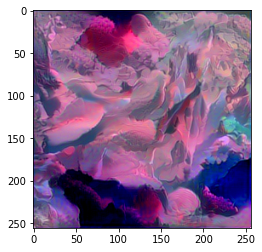

In [118]:
x1 = x.reshape((height, width, 3))
x1 = x1[:, :, ::-1]
x1[:, :, 0] += 103.939
x1[:, :, 1] += 116.779
x1[:, :, 2] += 123.68
x1 = np.clip(x1, 0, 255).astype('uint8')

Image.fromarray(x1)

import matplotlib.pyplot as plt
plt.imshow(x1)
